Importing librarries then loading the input files. Whole scripts uses Stacked Regression technique for training models and combining their results by averaging and weightage technique.

In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error # calculating square root. 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import LabelEncoder # for preprocessing
from scipy.stats import skew #for removing skewness
import xgboost as xgb # xgbooster model
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
import xgboost as xgb
import lightgbm as lgb
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

In [3]:
# Loading training data
train_df = pd.read_csv("input_files/train.csv")
test_df = pd.read_csv("input_files/test.csv")

Checking data loaded correctly. 

In [5]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### Data Prepocesssing 

Looking for outliers 

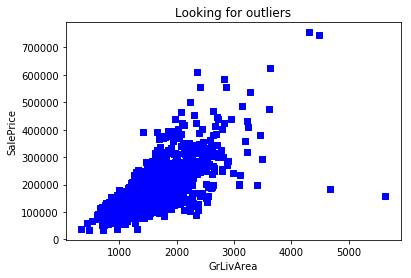

In [5]:
plt.scatter(train_df.GrLivArea, train_df.SalePrice, c = "blue", marker = "s")
plt.title("Looking for outliers")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

There are a few houses with more than 4000 sq ft living area that are outliers, so we drop them from the training data. But we are not removing it from completely. 

In [6]:
train_df.drop(train_df[train_df["GrLivArea"] > 4000].index, inplace=True)
train_df.drop(test_df[test_df["GrLivArea"] > 4000].index, inplace=True)

In [7]:
test_row = test_df.loc[666]
test_row

Id                  2127
MSSubClass            60
MSZoning              RM
LotFrontage           57
LotArea             8094
Street              Pave
Alley               Grvl
LotShape             Reg
LandContour          Lvl
Utilities         AllPub
LotConfig         Inside
LandSlope            Gtl
Neighborhood     OldTown
Condition1          Norm
Condition2          Norm
BldgType          2fmCon
HouseStyle        2.5Unf
OverallQual            6
OverallCond            8
YearBuilt           1910
YearRemodAdd        1983
RoofStyle          Gable
RoofMatl         CompShg
Exterior1st      Wd Sdng
Exterior2nd      Wd Sdng
MasVnrType          None
MasVnrArea             0
ExterQual             TA
ExterCond             TA
Foundation         PConc
                  ...   
HalfBath               0
BedroomAbvGr           5
KitchenAbvGr           1
KitchenQual           TA
TotRmsAbvGrd           8
Functional           Typ
Fireplaces             0
FireplaceQu          NaN
GarageType        Detchd


*Changing test data on ID 666 has values of GarageArea, GarageCars, and GarageTypebut so that they look more realistic when our model predict values.*

### Imputation of missing values

In [8]:
test_df.loc[666, "GarageQual"] = "TA"
test_df.loc[666, "GarageCond"] = "TA"
test_df.loc[666, "GarageFinish"] = "Unf"
test_df.loc[666, "GarageYrBlt"] = "1980"

For imputing missing values: fill in missing LotFrontage values by the median LotFrontage of the neighborhood.

In [9]:
lot_frontage_by_neighborhood = train_df["LotFrontage"].groupby(train_df["Neighborhood"])

Now we are going to convert the categorical text into numerical data for this I am going to use Label encoder. Documentation for Label encoder and one hot encoder is written here. https://blog.contactsunny.com/data-science/label-encoder-vs-one-hot-encoder-in-machine-learning
*categorical_encoder*  function is going to be used for this feature. 

In [10]:
label_encoder = LabelEncoder()

def categorical_encoder(df, categorical_encoder_df, column, fill_na=None):
    categorical_encoder_df[column] = df[column]
    if fill_na is not None:
        categorical_encoder_df[column].fillna(fill_na, inplace=True)
    label_encoder.fit(categorical_encoder_df[column].unique())
    categorical_encoder_df[column] = label_encoder.transform(categorical_encoder_df[column])
    return categorical_encoder_df

Now we are going to combine numberical features to one big data frame. Also we are going to use series of operations to preform imputation on our training and testing data. 

Conversion precedure types. 
1. Converting textual values that are given to numberical values manually using our own dictionaries.

In [11]:
def munge_dataframe(df):
    data_frame = pd.DataFrame(index=df.index)
     
    # Quality measurements are stored as text but we can 
    # convert them to numbers where a higher number means higher quality. 
    qual_dict = {None: 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
    data_frame["ExterQual"] = df["ExterQual"].map(qual_dict).astype(int)
    data_frame["ExterCond"] = df["ExterCond"].map(qual_dict).astype(int)
    data_frame["BsmtQual"] = df["BsmtQual"].map(qual_dict).astype(int)
    data_frame["BsmtCond"] = df["BsmtCond"].map(qual_dict).astype(int)
    data_frame["HeatingQC"] = df["HeatingQC"].map(qual_dict).astype(int)
    data_frame["KitchenQual"] = df["KitchenQual"].map(qual_dict).astype(int)
    data_frame["FireplaceQu"] = df["FireplaceQu"].map(qual_dict).astype(int)
    data_frame["GarageQual"] = df["GarageQual"].map(qual_dict).astype(int)
    data_frame["GarageCond"] = df["GarageCond"].map(qual_dict).astype(int)
    
    data_frame["BsmtExposure"] = df["BsmtExposure"].map(
        {None: 0, "No": 1, "Mn": 2, "Av": 3, "Gd": 4}).astype(int)

    bsmt_fin_dict = {None: 0, "Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ": 5, "GLQ": 6}
    data_frame["BsmtFinType1"] = df["BsmtFinType1"].map(bsmt_fin_dict).astype(int)
    data_frame["BsmtFinType2"] = df["BsmtFinType2"].map(bsmt_fin_dict).astype(int)

    data_frame["Functional"] = df["Functional"].map(
        {None: 0, "Sal": 1, "Sev": 2, "Maj2": 3, "Maj1": 4,
         "Mod": 5, "Min2": 6, "Min1": 7, "Typ": 8}).astype(int)

    data_frame["GarageFinish"] = df["GarageFinish"].map(
        {None: 0, "Unf": 1, "RFn": 2, "Fin": 3}).astype(int)

    data_frame["Fence"] = df["Fence"].map(
        {None: 0, "MnWw": 1, "GdWo": 2, "MnPrv": 3, "GdPrv": 4}).astype(int)

    data_frame["YearBuilt"] = df["YearBuilt"]
    data_frame["YearRemodAdd"] = df["YearRemodAdd"]

    data_frame["GarageYrBlt"] = df["GarageYrBlt"]
    data_frame["GarageYrBlt"].fillna(0.0, inplace=True) # converying to float values. 

    data_frame["MoSold"] = df["MoSold"]
    data_frame["YrSold"] = df["YrSold"]

    data_frame["LowQualFinSF"] = df["LowQualFinSF"]
    data_frame["MiscVal"] = df["MiscVal"]

    data_frame["PoolQC"] = df["PoolQC"].map(qual_dict).astype(int)
    
    data_frame["OverallQual"] = df["OverallQual"]
    data_frame["OverallCond"] = df["OverallCond"]
    
     # Simplifications of existing features into bad/average/good.
    data_frame["SimplOverallQual"] = data_frame.OverallQual.replace(
        {1: 1, 2: 1, 3: 1, 4: 2, 5: 2, 6: 2, 7: 3, 8: 3, 9: 3, 10: 3})
    data_frame["SimplOverallCond"] = data_frame.OverallCond.replace(
        {1: 1, 2: 1, 3: 1, 4: 2, 5: 2, 6: 2, 7: 3, 8: 3, 9: 3, 10: 3})
    data_frame["SimplPoolQC"] = data_frame.PoolQC.replace(
        {1: 1, 2: 1, 3: 2, 4: 2})
    data_frame["SimplGarageCond"] = data_frame.GarageCond.replace(
        {1: 1, 2: 1, 3: 1, 4: 2, 5: 2})
    data_frame["SimplGarageQual"] = data_frame.GarageQual.replace(
        {1: 1, 2: 1, 3: 1, 4: 2, 5: 2})
    data_frame["SimplFireplaceQu"] = data_frame.FireplaceQu.replace(
        {1: 1, 2: 1, 3: 1, 4: 2, 5: 2})
    data_frame["SimplFireplaceQu"] = data_frame.FireplaceQu.replace(
        {1: 1, 2: 1, 3: 1, 4: 2, 5: 2})
    data_frame["SimplFunctional"] = data_frame.Functional.replace(
        {1: 1, 2: 1, 3: 2, 4: 2, 5: 3, 6: 3, 7: 3, 8: 4})
    data_frame["SimplKitchenQual"] = data_frame.KitchenQual.replace(
        {1: 1, 2: 1, 3: 1, 4: 2, 5: 2})
    data_frame["SimplHeatingQC"] = data_frame.HeatingQC.replace(
        {1: 1, 2: 1, 3: 1, 4: 2, 5: 2})
    data_frame["SimplBsmtFinType1"] = data_frame.BsmtFinType1.replace(
        {1: 1, 2: 1, 3: 1, 4: 2, 5: 2, 6: 2})
    data_frame["SimplBsmtFinType2"] = data_frame.BsmtFinType2.replace(
        {1: 1, 2: 1, 3: 1, 4: 2, 5: 2, 6: 2})
    data_frame["SimplBsmtCond"] = data_frame.BsmtCond.replace(
        {1: 1, 2: 1, 3: 1, 4: 2, 5: 2})
    data_frame["SimplBsmtQual"] = data_frame.BsmtQual.replace(
        {1: 1, 2: 1, 3: 1, 4: 2, 5: 2})
    data_frame["SimplExterCond"] = data_frame.ExterCond.replace(
        {1: 1, 2: 1, 3: 1, 4: 2, 5: 2})
    data_frame["SimplExterQual"] = data_frame.ExterQual.replace(
        {1: 1, 2: 1, 3: 1, 4: 2, 5: 2})
    
    data_frame["LotFrontage"] = df["LotFrontage"]
    
    #working on sorting out lot_frontage values using median approach as described above. 
    for key, group in lot_frontage_by_neighborhood:
        idx = (df["Neighborhood"] == key) & (df["LotFrontage"].isnull())
        data_frame.loc[idx, "LotFrontage"] = group.median()

    data_frame["LotArea"] = df["LotArea"]

    
    data_frame["PoolArea"] = df["PoolArea"]
    data_frame["PoolArea"].fillna(0, inplace=True)
    
    data_frame["MasVnrArea"] = df["MasVnrArea"]
    data_frame["MasVnrArea"].fillna(0, inplace=True) # replacing 

    data_frame["BsmtFinSF1"] = df["BsmtFinSF1"]
    data_frame["BsmtFinSF1"].fillna(0, inplace=True)

    data_frame["BsmtFinSF2"] = df["BsmtFinSF2"]
    data_frame["BsmtFinSF2"].fillna(0, inplace=True)

    data_frame["BsmtUnfSF"] = df["BsmtUnfSF"]
    data_frame["BsmtUnfSF"].fillna(0, inplace=True)

    data_frame["TotalBsmtSF"] = df["TotalBsmtSF"]
    data_frame["TotalBsmtSF"].fillna(0, inplace=True)
    
    data_frame["GarageArea"] = df["GarageArea"]
    data_frame["GarageArea"].fillna(0, inplace=True)
    
    data_frame["BsmtFullBath"] = df["BsmtFullBath"]
    data_frame["BsmtFullBath"].fillna(0, inplace=True)

    data_frame["BsmtHalfBath"] = df["BsmtHalfBath"]
    data_frame["BsmtHalfBath"].fillna(0, inplace=True)
    
    data_frame["GarageCars"] = df["GarageCars"]
    data_frame["GarageCars"].fillna(0, inplace=True)
    
    data_frame["CentralAir"] = (df["CentralAir"] == "Y") * 1.0

    data_frame["1stFlrSF"] = df["1stFlrSF"]
    data_frame["2ndFlrSF"] = df["2ndFlrSF"]
    data_frame["GrLivArea"] = df["GrLivArea"]
    data_frame["WoodDeckSF"] = df["WoodDeckSF"]
    data_frame["OpenPorchSF"] = df["OpenPorchSF"]
    data_frame["EnclosedPorch"] = df["EnclosedPorch"]
    data_frame["3SsnPorch"] = df["3SsnPorch"]
    data_frame["ScreenPorch"] = df["ScreenPorch"]
    data_frame["FullBath"] = df["FullBath"]
    data_frame["HalfBath"] = df["HalfBath"]
    data_frame["BedroomAbvGr"] = df["BedroomAbvGr"]
    data_frame["KitchenAbvGr"] = df["KitchenAbvGr"]
    data_frame["TotRmsAbvGrd"] = df["TotRmsAbvGrd"]
    data_frame["Fireplaces"] = df["Fireplaces"]
   


    # Add categorical features as numbers too. It seems to help a bit.
    data_frame = categorical_encoder(df, data_frame, "MSSubClass")
    data_frame = categorical_encoder(df, data_frame, "MSZoning", "RL")
    data_frame = categorical_encoder(df, data_frame, "LotConfig")
    data_frame = categorical_encoder(df, data_frame, "Neighborhood")
    data_frame = categorical_encoder(df, data_frame, "Condition1")
    data_frame = categorical_encoder(df, data_frame, "BldgType")
    data_frame = categorical_encoder(df, data_frame, "HouseStyle")
    data_frame = categorical_encoder(df, data_frame, "RoofStyle")
    data_frame = categorical_encoder(df, data_frame, "Exterior1st", "Other")
    data_frame = categorical_encoder(df, data_frame, "Exterior2nd", "Other")
    data_frame = categorical_encoder(df, data_frame, "MasVnrType", "None")
    data_frame = categorical_encoder(df, data_frame, "Foundation")
    data_frame = categorical_encoder(df, data_frame, "SaleType", "Oth")
    data_frame = categorical_encoder(df, data_frame, "SaleCondition")

    # IR2 and IR3 don't appear that often, so just make a distinction
    # between regular and irregular.
    data_frame["IsRegularLotShape"] = (df["LotShape"] == "Reg") * 1

    # Most properties are level; bin the other possibilities together
    # as "not level".
    data_frame["IsLandLevel"] = (df["LandContour"] == "Lvl") * 1

    # Most land slopes are gentle; treat the others as "not gentle".
    data_frame["IsLandSlopeGentle"] = (df["LandSlope"] == "Gtl") * 1

    # Most properties use standard circuit breakers.
    data_frame["IsElectricalSBrkr"] = (df["Electrical"] == "SBrkr") * 1

    # About 2/3rd have an attached garage.
    data_frame["IsGarageDetached"] = (df["GarageType"] == "Detchd") * 1

    # Most have a paved drive. Treat dirt/gravel and partial pavement
    # as "not paved".
    data_frame["IsPavedDrive"] = (df["PavedDrive"] == "Y") * 1

    # The only interesting "misc. feature" is the presence of a shed.
    data_frame["HasShed"] = (df["MiscFeature"] == "Shed") * 1.

    # If YearRemodAdd != YearBuilt, then a remodeling took place at some point.
    data_frame["Remodeled"] = (data_frame["YearRemodAdd"] != data_frame["YearBuilt"]) * 1

    # Did a remodeling happen in the year the house was sold?
    data_frame["RecentRemodel"] = (data_frame["YearRemodAdd"] == data_frame["YrSold"]) * 1

    # Was this house sold in the year it was built?
    data_frame["VeryNewHouse"] = (data_frame["YearBuilt"] == data_frame["YrSold"]) * 1

    data_frame["Has2ndFloor"] = (data_frame["2ndFlrSF"] == 0) * 1
    data_frame["HasMasVnr"] = (data_frame["MasVnrArea"] == 0) * 1
    data_frame["HasWoodDeck"] = (data_frame["WoodDeckSF"] == 0) * 1
    data_frame["HasOpenPorch"] = (data_frame["OpenPorchSF"] == 0) * 1
    data_frame["HasEnclosedPorch"] = (data_frame["EnclosedPorch"] == 0) * 1
    data_frame["Has3SsnPorch"] = (data_frame["3SsnPorch"] == 0) * 1
    data_frame["HasScreenPorch"] = (data_frame["ScreenPorch"] == 0) * 1


    # Months with the largest number of deals may be significant.
    data_frame["HighSeason"] = df["MoSold"].replace(
        {1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 6: 1, 7: 1, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0})

    data_frame["NewerDwelling"] = df["MSSubClass"].replace(
        {20: 1, 30: 0, 40: 0, 45: 0, 50: 0, 60: 1, 70: 0, 75: 0, 80: 0, 85: 0,
         90: 0, 120: 1, 150: 0, 160: 0, 180: 0, 190: 0})

    data_frame.loc[df.Neighborhood == 'NridgHt', "Neighborhood_Good"] = 1
    data_frame.loc[df.Neighborhood == 'Crawfor', "Neighborhood_Good"] = 1
    data_frame.loc[df.Neighborhood == 'StoneBr', "Neighborhood_Good"] = 1
    data_frame.loc[df.Neighborhood == 'Somerst', "Neighborhood_Good"] = 1
    data_frame.loc[df.Neighborhood == 'NoRidge', "Neighborhood_Good"] = 1
    data_frame["Neighborhood_Good"].fillna(0, inplace=True)

    data_frame["SaleCondition_PriceDown"] = df.SaleCondition.replace(
        {'Abnorml': 1, 'Alloca': 1, 'AdjLand': 1, 'Family': 1, 'Normal': 0, 'Partial': 0})

    # House completed before sale or not
    data_frame["BoughtOffPlan"] = df.SaleCondition.replace(
        {"Abnorml": 0, "Alloca": 0, "AdjLand": 0, "Family": 0, "Normal": 0, "Partial": 1})

    data_frame["BadHeating"] = df.HeatingQC.replace(
        {'Ex': 0, 'Gd': 0, 'TA': 0, 'Fa': 1, 'Po': 1})

    area_cols = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF',
                 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'LowQualFinSF', 'PoolArea']
    data_frame["TotalArea"] = data_frame[area_cols].sum(axis=1)

    data_frame["TotalArea1st2nd"] = data_frame["1stFlrSF"] + data_frame["2ndFlrSF"]

    data_frame["Age"] = 2010 - data_frame["YearBuilt"]
    data_frame["TimeSinceSold"] = 2010 - data_frame["YrSold"]

    data_frame["SeasonSold"] = data_frame["MoSold"].map({12: 0, 1: 0, 2: 0, 3: 1, 4: 1, 5: 1,
                                                 6: 2, 7: 2, 8: 2, 9: 3, 10: 3, 11: 3}).astype(int)

    data_frame["YearsSinceRemodel"] = data_frame["YrSold"] - data_frame["YearRemodAdd"]

   
    # Bin by neighborhood (a little arbitrarily). Values were computed by:
    # train_df["SalePrice"].groupby(train_df["Neighborhood"]).median().sort_values()
    neighborhood_map = {
        "MeadowV": 0,  # 88000
        "IDOTRR": 1,  # 103000
        "BrDale": 1,  # 106000
        "OldTown": 1,  # 119000
        "Edwards": 1,  # 119500
        "BrkSide": 1,  # 124300
        "Sawyer": 1,  # 135000
        "Blueste": 1,  # 137500
        "SWISU": 2,  # 139500
        "NAmes": 2,  # 140000
        "NPkVill": 2,  # 146000
        "Mitchel": 2,  # 153500
        "SawyerW": 2,  # 179900
        "Gilbert": 2,  # 181000
        "NWAmes": 2,  # 182900
        "Blmngtn": 2,  # 191000
        "CollgCr": 2,  # 197200
        "ClearCr": 3,  # 200250
        "Crawfor": 3,  # 200624
        "Veenker": 3,  # 218000
        "Somerst": 3,  # 225500
        "Timber": 3,  # 228475
        "StoneBr": 4,  # 278000
        "NoRidge": 4,  # 290000
        "NridgHt": 4,  # 315000
    }

    data_frame["NeighborhoodBin"] = df["Neighborhood"].map(neighborhood_map)
    return data_frame

Till now we have converted all categorical data into numerical form and so that models can recoginized it and predict better. 

In [12]:
train_df_munged = munge_dataframe(train_df)
test_df_munged = munge_dataframe(test_df)

print(train_df_munged.shape)
print(test_df_munged.shape)

(1455, 111)
(1459, 111)


Copying the NeighborhoodBin into copied df to use it later for as unscaled version of it   

In [13]:
neighborhood_bin_train = pd.DataFrame(index=train_df.index)
neighborhood_bin_train["NeighborhoodBin"] = train_df_munged["NeighborhoodBin"]
neighborhood_bin_test = pd.DataFrame(index=test_df.index)
neighborhood_bin_test["NeighborhoodBin"] = test_df_munged["NeighborhoodBin"]

print(train_df_munged.shape)
print(test_df_munged.shape)

(1455, 111)
(1459, 111)


#### Skewness of the data
I'll transform the skewed numeric features by taking log(feature + 1) - this will make the features more normal

In [14]:
numeric_features = train_df_munged.dtypes[train_df_munged.dtypes != "object"].index
skewed = train_df_munged[numeric_features].apply(lambda x: skew(x.dropna().astype(float)))
skewed = skewed[skewed > 0.75]
skewed = skewed.index

train_df_munged[skewed] = np.log1p(train_df_munged[skewed])
test_df_munged[skewed] = np.log1p(test_df_munged[skewed])
print(train_df_munged.shape)
print(test_df_munged.shape)

(1455, 111)
(1459, 111)


** Sacling data using StandardScaler **

In [15]:
scaler = StandardScaler()
scaler.fit(train_df_munged[numeric_features])

scaled = scaler.transform(train_df_munged[numeric_features])
for i, col in enumerate(numeric_features):
    train_df_munged[col] = scaled[:, i]

scaled = scaler.transform(test_df_munged[numeric_features])
for i, col in enumerate(numeric_features):
    test_df_munged[col] = scaled[:, i]
    
print(train_df_munged.shape)
print(test_df_munged.shape)

(1455, 111)
(1459, 111)


#### Using One Hot Encoder
I will add two function will convert the categorical numeric features to onhot data simply converting them to "0" and "1". For reading more about them this link will help.
https://blog.contactsunny.com/data-science/label-encoder-vs-one-hot-encoder-in-machine-learning

In [16]:
def onehot(onehot_df, df, column_name, fill_na, drop_name):
    onehot_df[column_name] = df[column_name]
    if fill_na is not None:
        onehot_df[column_name].fillna(fill_na, inplace=True)
    dummies = pd.get_dummies(onehot_df[column_name], prefix="_" + column_name)
    onehot_df = onehot_df.join(dummies)
    onehot_df = onehot_df.drop([column_name], axis=1)
    return onehot_df


def munge_onehot(df):
    onehot_df = pd.DataFrame(index=df.index)

    onehot_df = onehot(onehot_df, df, "MSSubClass", None, "40")
    onehot_df = onehot(onehot_df, df, "MSZoning", "RL", "RH")
    onehot_df = onehot(onehot_df, df, "LotConfig", None, "FR3")
    onehot_df = onehot(onehot_df, df, "Neighborhood", None, "OldTown")
    onehot_df = onehot(onehot_df, df, "Condition1", None, "RRNe")
    onehot_df = onehot(onehot_df, df, "BldgType", None, "2fmCon")
    onehot_df = onehot(onehot_df, df, "HouseStyle", None, "1.5Unf")
    onehot_df = onehot(onehot_df, df, "RoofStyle", None, "Shed")
    onehot_df = onehot(onehot_df, df, "Exterior1st", "VinylSd", "CBlock")
    onehot_df = onehot(onehot_df, df, "Exterior2nd", "VinylSd", "CBlock")
    onehot_df = onehot(onehot_df, df, "Foundation", None, "Wood")
    onehot_df = onehot(onehot_df, df, "SaleType", "WD", "Oth")
    onehot_df = onehot(onehot_df, df, "SaleCondition", "Normal", "AdjLand")

    # Fill in missing MasVnrType for rows that do have a MasVnrArea.
    temp_df = df[["MasVnrType", "MasVnrArea"]].copy()
    idx = (df["MasVnrArea"] != 0) & ((df["MasVnrType"] == "None") | (df["MasVnrType"].isnull()))
    temp_df.loc[idx, "MasVnrType"] = "BrkFace"
    onehot_df = onehot(onehot_df, temp_df, "MasVnrType", "None", "BrkCmn")

    # Also add the booleans from calc_df as dummy variables.
    onehot_df = onehot(onehot_df, df, "LotShape", None, "IR3")
    onehot_df = onehot(onehot_df, df, "LandContour", None, "Low")
    onehot_df = onehot(onehot_df, df, "LandSlope", None, "Sev")
    onehot_df = onehot(onehot_df, df, "Electrical", "SBrkr", "FuseP")
    onehot_df = onehot(onehot_df, df, "GarageType", "None", "CarPort")
    onehot_df = onehot(onehot_df, df, "PavedDrive", None, "P")
    onehot_df = onehot(onehot_df, df, "MiscFeature", "None", "Othr")

    # Features we can probably ignore (but want to include anyway to see
    # if they make any positive difference).
    # Definitely ignoring Utilities: input_files records are "AllPub", except for
    # one "NoSeWa" in the train set and 2 NA in the test set.
    onehot_df = onehot(onehot_df, df, "Street", None, "Grvl")
    onehot_df = onehot(onehot_df, df, "Alley", "None", "Grvl")
    onehot_df = onehot(onehot_df, df, "Condition2", None, "PosA")
    onehot_df = onehot(onehot_df, df, "RoofMatl", None, "WdShake")
    onehot_df = onehot(onehot_df, df, "Heating", None, "Wall")

    # I have these as numerical variables too.
    onehot_df = onehot(onehot_df, df, "ExterQual", "None", "Ex")
    onehot_df = onehot(onehot_df, df, "ExterCond", "None", "Ex")
    onehot_df = onehot(onehot_df, df, "BsmtQual", "None", "Ex")
    onehot_df = onehot(onehot_df, df, "BsmtCond", "None", "Ex")
    onehot_df = onehot(onehot_df, df, "HeatingQC", "None", "Ex")
    onehot_df = onehot(onehot_df, df, "KitchenQual", "TA", "Ex")
    onehot_df = onehot(onehot_df, df, "FireplaceQu", "None", "Ex")
    onehot_df = onehot(onehot_df, df, "GarageQual", "None", "Ex")
    onehot_df = onehot(onehot_df, df, "GarageCond", "None", "Ex")
    onehot_df = onehot(onehot_df, df, "PoolQC", "None", "Ex")
    onehot_df = onehot(onehot_df, df, "BsmtExposure", "None", "Gd")
    onehot_df = onehot(onehot_df, df, "BsmtFinType1", "None", "GLQ")
    onehot_df = onehot(onehot_df, df, "BsmtFinType2", "None", "GLQ")
    onehot_df = onehot(onehot_df, df, "Functional", "Typ", "Typ")
    onehot_df = onehot(onehot_df, df, "GarageFinish", "None", "Fin")
    onehot_df = onehot(onehot_df, df, "Fence", "None", "MnPrv")
    onehot_df = onehot(onehot_df, df, "MoSold", None, None)

    # Divide up the years between 1871 and 2010 in slices of 20 years.
    year_map = pd.concat(
        pd.Series("YearBin" + str(i + 1), index=range(1871 + i * 20, 1891 + i * 20)) for i in range(0, 7))

    yearbin_df = pd.DataFrame(index=df.index)
    yearbin_df["GarageYrBltBin"] = df.GarageYrBlt.map(year_map)
    yearbin_df["GarageYrBltBin"].fillna("NoGarage", inplace=True)

    yearbin_df["YearBuiltBin"] = df.YearBuilt.map(year_map)
    yearbin_df["YearRemodAddBin"] = df.YearRemodAdd.map(year_map)

    onehot_df = onehot(onehot_df, yearbin_df, "GarageYrBltBin", None, None)
    onehot_df = onehot(onehot_df, yearbin_df, "YearBuiltBin", None, None)
    onehot_df = onehot(onehot_df, yearbin_df, "YearRemodAddBin", None, None)

    return onehot_df

Adding one hot categorical features. 

In [17]:
onehot_df = munge_onehot(train_df)
onehot_df = onehot(onehot_df, neighborhood_bin_train, "NeighborhoodBin", None, None)
train_df_munged = train_df_munged.join(onehot_df)

#### Droping columns that are not in test data. 
The reason we are dropping them is because they might overfit the data. 

In [18]:
drop_cols = [
    "_Exterior1st_ImStucc", "_Exterior1st_Stone",
    "_Exterior2nd_Other", "_HouseStyle_2.5Fin",

    "_RoofMatl_Membran", "_RoofMatl_Metal", "_RoofMatl_Roll",
    "_Condition2_RRAe", "_Condition2_RRAn", "_Condition2_RRNn",
    "_Heating_Floor", "_Heating_OthW",

    "_Electrical_Mix",
    "_MiscFeature_TenC",
    "_GarageQual_Ex", "_PoolQC_Fa"
]
train_df_munged.drop(drop_cols, axis=1, inplace=True)

In [19]:
onehot_df = munge_onehot(test_df)
onehot_df = onehot(onehot_df, neighborhood_bin_test, "NeighborhoodBin", None, None)
test_df_munged = test_df_munged.join(onehot_df)

In [20]:
# This column is missing in the training data. There is only one example with
# this value in the test set. So just drop it.
test_df_munged.drop(["_MSSubClass_150"], axis=1, inplace=True)

# Drop these columns. They are either not very helpful or they cause overfitting.
drop_cols = [
    "_Condition2_PosN",    # only two are not zero
    "_MSZoning_C (all)",
    "_MSSubClass_160",
]
train_df_munged.drop(drop_cols, axis=1, inplace=True)
test_df_munged.drop(drop_cols, axis=1, inplace=True)

Adding one hot categorical features to test data as well. 

In [21]:
# We take the log here because the error metric is between the log of the
# SalePrice and the log of the predicted price. That does mean we need to
# exp() the prediction to get an actual sale price.
label_df = pd.DataFrame(index=train_df_munged.index, columns=["SalePrice"])
label_df["SalePrice"] = np.log(train_df["SalePrice"])

print("Training set size:", train_df_munged.shape)
print("Test set size:", test_df_munged.shape)

Training set size: (1455, 403)
Test set size: (1459, 403)


In [22]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

#### Modeling
I will perform modeling based on lots of regressors so that we can stack them later and get the everages out of them. I have used Stacked regressin technique for reaching best values. 
**Models:**
1. LASSO
2. Elastic Net
3. Kernel Ridge
4. Gradient Boosting 
5. XGBoost
6. LightGBM


#### Validation

In [89]:
#Validation function
n_folds = 10
def rmsle_cv(model):
    log_sale_prices = np.log1p(train_df.SalePrice.values)
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train_df_munged)
    rmse= np.sqrt(-cross_val_score(model, train_df_munged.values, log_sale_prices, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [30]:
### Base Models

LASSO Regression :
This model may be very sensitive to outliers. So we need to made it more robust on them. For that we use the sklearn's Robustscaler() method on pipeline

In [31]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

Elastic Net Regression :
again made robust to outliers

In [32]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

Kernel Ridge Regression :

In [33]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

Gradient Boosting Regression :
With huber loss that makes it robust to outliers

In [91]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)


XGBoost:

In [92]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)


LightGBM:

In [93]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [53]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1101 (0.0058)



In [54]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1101 (0.0059)



In [55]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.1100 (0.0052)



In [58]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1156 (0.0070)



In [59]:
core = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.1156 (0.0070)



In [60]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.1145 (0.0061)



In [95]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=10):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [62]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.1081 (0.0052)


In [64]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [96]:
log_sale_prices_for_train = np.log1p(train_df.SalePrice.values)

stacked_averaged_models.fit(train_df_munged.values, log_sale_prices_for_train)
stacked_train_pred = stacked_averaged_models.predict(train_df_munged.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test_df_munged.values))

print(rmsle(log_sale_prices_for_train, stacked_train_pred))

0.07552220895420006


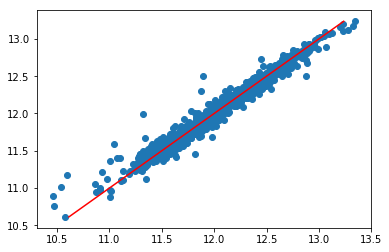

In [98]:
plt.scatter(log_sale_prices_for_train, stacked_train_pred)
plt.plot([min(stacked_train_pred),max(stacked_train_pred)], [min(stacked_train_pred),max(stacked_train_pred)], c="red")

In [99]:
model_xgb.fit(train_df_munged.values, log_sale_prices_for_train)
xgb_train_pred = model_xgb.predict(train_df_munged.values)
xgb_pred = np.expm1(model_xgb.predict(test_df_munged.values))
print(rmsle(log_sale_prices_for_train, xgb_train_pred))

0.0772179606155098


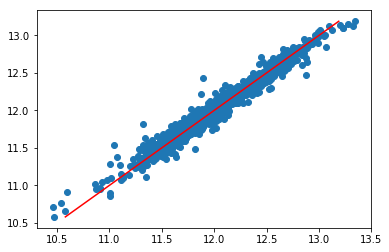

In [100]:
plt.scatter(log_sale_prices_for_train, xgb_train_pred)
plt.plot([min(xgb_train_pred),max(xgb_train_pred)], [min(xgb_train_pred),max(xgb_train_pred)], c="red")

In [68]:
model_lgb.fit(train_df_munged.values, log_sale_prices_for_train)
lgb_train_pred = model_lgb.predict(train_df_munged.values)
lgb_pred = np.expm1(model_lgb.predict(test_df_munged.values))
print(rmsle(log_sale_prices_for_train, lgb_train_pred))

0.06870368308518716


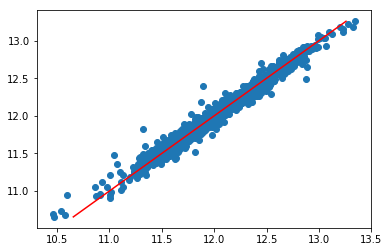

In [101]:
plt.scatter(log_sale_prices_for_train, lgb_train_pred)
plt.plot([min(lgb_train_pred),max(lgb_train_pred)], [min(lgb_train_pred),max(lgb_train_pred)], c="red")

In [69]:
'''RMSE on the entire Train data when averaging'''
print('RMSLE score on train data:')
print(rmsle(log_sale_prices_for_train , stacked_train_pred*0.75 +
               xgb_train_pred*0.125 + lgb_train_pred*0.125 ))

RMSLE score on train data:
0.07285350634811921


In [102]:
ensemble = stacked_pred*0.75 + xgb_pred*0.125 + lgb_pred*0.125

In [88]:
pred_df = pd.DataFrame(ensemble, index=test_df["Id"], columns=["SalePrice"])
pred_df.to_csv('output.csv', header=True, index_label='Id')